# Os efeitos da pandemia e mudança de governos sobre o preço de combustível 

Neste notebook, iremos analizar como a pandemia e a mudança de governo impactaram no preço do combustível.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import clear_output as cls
import time
import seaborn as sb
from sklearn.cluster import KMeans

# Ações PETR3

In [ ]:
petr3_df = pd.read_csv("arquivos/Acoes/PETR3.csv")

- Analisando as medidas de centralidade e dispersão das variáveis disponíveis

In [ ]:
print("Dados de máxima: ")
print(f"Média = {petr3_df['Máxima'].mean()}")
print(f"Mediana = {petr3_df['Máxima'].median()}")
print(f"Máximo = {petr3_df['Máxima'].max()}")
print(f"Mínima = {petr3_df['Máxima'].min()}")
print(f"Variância = {petr3_df['Máxima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Máxima'].std()}") 

Dados de máxima: 
Média = 17.379285714285714
Mediana = 13.48
Máximo = 44.5
Mínima = 5.77
Variância = 104.52983080895008
Desvio Padrão = 10.223983118577127


In [ ]:
print("Dados de mínima: ")
print(f"Média = {petr3_df['Mínima'].mean()}")
print(f"Mediana = {petr3_df['Mínima'].median()}")
print(f"Máximo = {petr3_df['Mínima'].max()}")
print(f"Mínima = {petr3_df['Mínima'].min()}")
print(f"Variância = {petr3_df['Mínima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Mínima'].std()}") 

Dados de mínima: 
Média = 14.68797619047619
Mediana = 11.67
Máximo = 40.74
Mínima = 4.46
Variância = 80.64133681870341
Desvio Padrão = 8.980052161246247


Aqui, observamos a relação entre os valores máximos e mínimos das ações

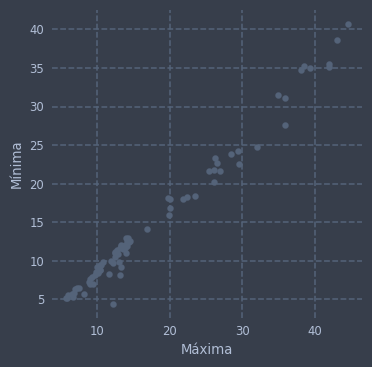

In [ ]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Mínima')

Relação entre o volume e os mínimos das ações

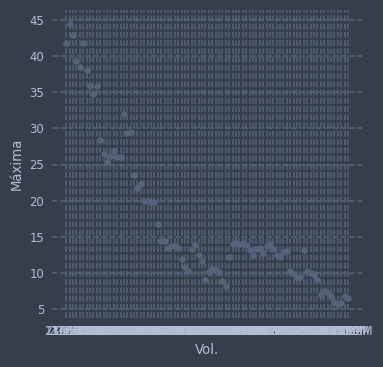

In [ ]:
dispersao = petr3_df.plot.scatter(x='Vol.', y='Máxima')

Relação entre os valores máximos e variancia das ações

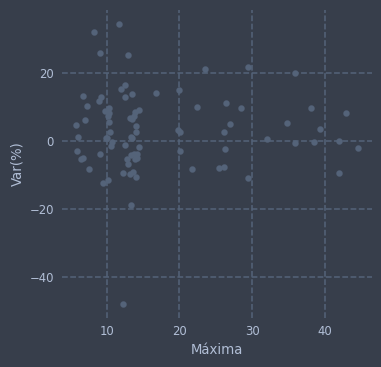

In [ ]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Var(%)')

In [ ]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Var(%)"]] 

,Data,Var(%)
48,01.March.2020,-47.92
37,01.February.2021,-18.95
69,01.June.2018,-12.48
42,01.September.2020,-11.42
18,01.September.2022,-11.00
...,...,...
19,01.August.2022,21.58
65,01.October.2018,25.13
74,01.January.2018,25.96
47,01.April.2020,31.90


In [ ]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Máxima"]]

,Data,Máxima
48,01.March.2020,12.26
37,01.February.2021,13.28
69,01.June.2018,9.48
42,01.September.2020,10.17
18,01.September.2022,29.43
...,...,...
19,01.August.2022,29.47
65,01.October.2018,12.99
74,01.January.2018,9.08
47,01.April.2020,8.20


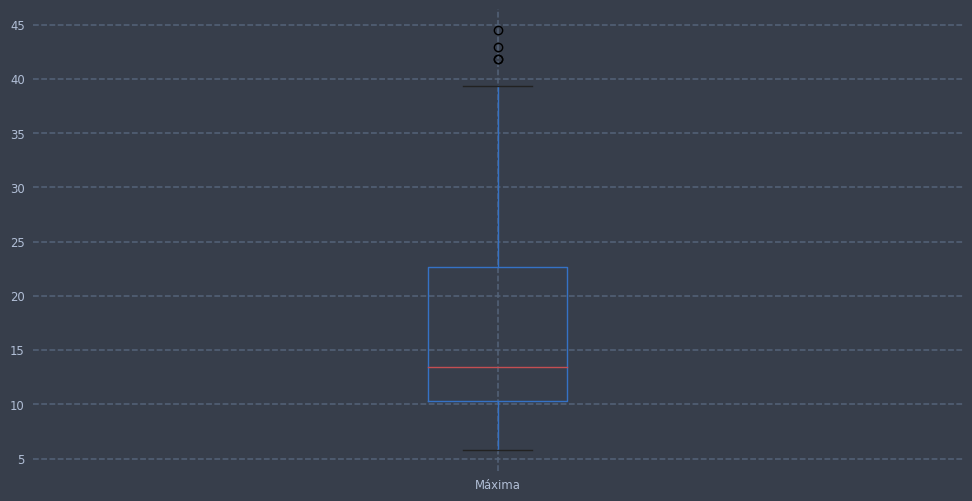

In [ ]:
ax = petr3_df.boxplot(column = "Máxima", figsize = (12,6))

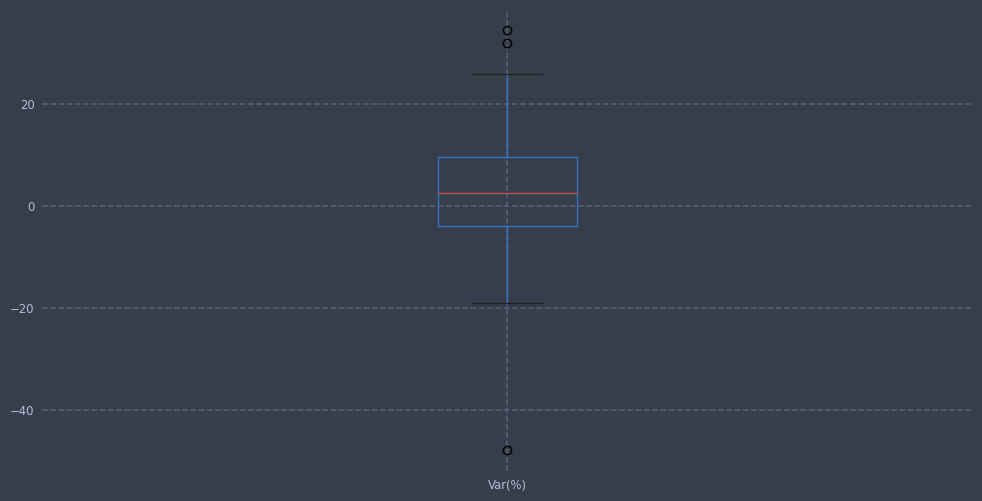

In [ ]:
ax = petr3_df.boxplot(column = "Var(%)", figsize = (12,6))

# IDH


In [ ]:
#Lendo os dados da base
dataIdh = pd.read_csv("arquivos/IDH/2017-2021_idh.csv")

#Printando informações dos dados (Variancia, média, quartis, etc...)
print(f"var      {dataIdh['idh'].var():.6f}")
print(dataIdh["idh"].describe())

var      0.000023
count    5.000000
mean     0.760200
std      0.004817
min      0.754000
25%      0.758000
50%      0.759000
75%      0.764000
max      0.766000
Name: idh, dtype: float64


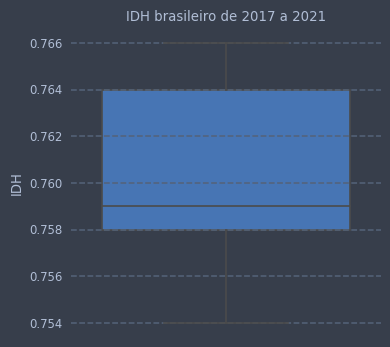

In [ ]:
#Boxplot dos dados de referentes a IDH de 2017 a 2021
idhBox = sb.boxplot(dataIdh, y='idh').set_title("IDH brasileiro de 2017 a 2021")

plt.ylabel("IDH")

plt.show(idhBox)

Podemos ver abaixo, como o IDH do Brasil se alterou com o tempo que a pandemia passou

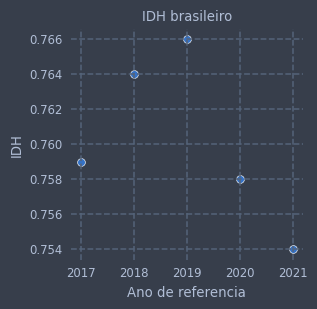

In [150]:
#Definindo tamanho da imagem do gráfico
plt.figure(figsize=(3,3))

#Criando gráfico de disperção com base nos anos e valores de idh
dispersaoIdh = sb.scatterplot(data=dataIdh, x='ano_referencia', y='idh')

#Definindo títulos do gráfico
dispersaoIdh.set_title("IDH brasileiro")
dispersaoIdh.set_ylabel("IDH")
dispersaoIdh.set_xlabel("Ano de referencia")

#Exibindo o gráfico
plt.show()

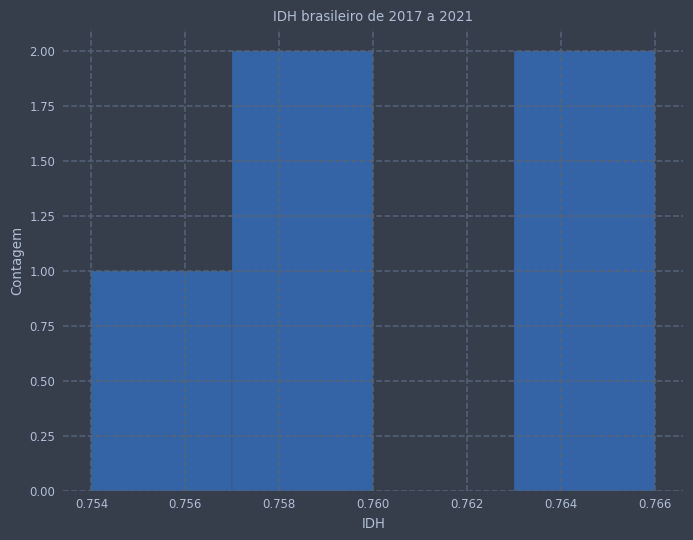

In [ ]:
#Definindo tamanho da imagem do gráfico
plt.figure(figsize=(8,6))

#Histograma dados dados de IDH entre 2017 e 2021
histIdh = sb.histplot(dataIdh, x='idh').set_title("IDH brasileiro de 2017 a 2021")

#Mudando o título dos eixos
plt.xlabel("IDH")
plt.ylabel("Contagem")

#Plotando os gráficos
plt.show()

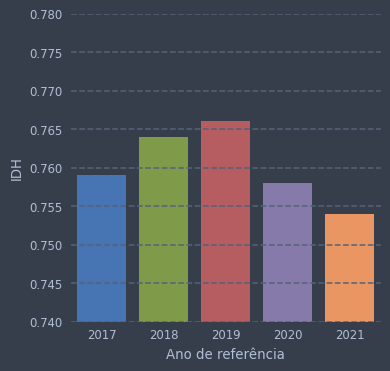

In [ ]:
#Criando gráfico de barras com os dados de IDH ao longo dos anos
idhBar = sb.barplot(data=dataIdh, x='ano_referencia', y='idh')

#Definindo intervalo de valores do eixo y mostrado no gráfico
eixo = plt.gca()
eixo.set_ylim([0.74, 0.78])

#Alterando títulos dos eixos
plt.xlabel("Ano de referência")
plt.ylabel("IDH")

#Exibindo o gráfico
plt.show()

Abaixo, como o IDH de cada estado se comportou ao longo dos anos de pandemia

In [ ]:
#Lendo os dados da base
dataIdhReg = pd.read_csv("arquivos/IDH/2017-2021_BRASIL-GDL-Subnational-HDI-data.csv")
dataIdhReg = dataIdhReg.drop(0) # removendo linha que informa o total

describe_IDHReg = dataIdhReg.describe() # ciando um dataframe com algumas infos do dataset

describe_IDHReg.loc[len(describe_IDHReg)] = dataIdhReg.var(numeric_only=True) # adicionando uma linha com informções de variância
describe_IDHReg = describe_IDHReg.rename(index={8: "var"}) # renomeando a linha que foi criada

# mostrando as infos do dataset
describe_IDHReg

,2017,2018,2019,2020,2021
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.749000,0.753963,0.756074,0.747889,0.744074
std,0.026932,0.027016,0.027357,0.027040,0.026899
min,0.703000,0.708000,0.709000,0.702000,0.698000
25%,0.732500,0.737500,0.739500,0.731500,0.727500
50%,0.748000,0.753000,0.755000,0.746000,0.743000
75%,0.764000,0.769000,0.771000,0.763000,0.759000
max,0.821000,0.826000,0.829000,0.820000,0.816000
var,0.000725,0.000730,0.000748,0.000731,0.000724


Text(0.5, 1.0, 'IDH dos estados ao longo dos anos')

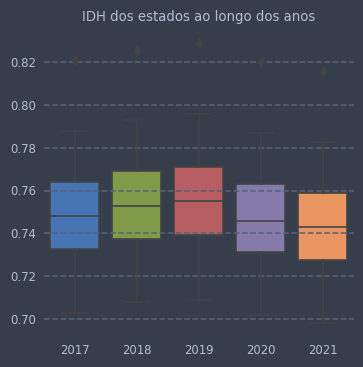

In [ ]:
#Boxplot dos dados de IDH ao longo dos anos
sb.boxplot(data=dataIdhReg).set_title('IDH dos estados ao longo dos anos')

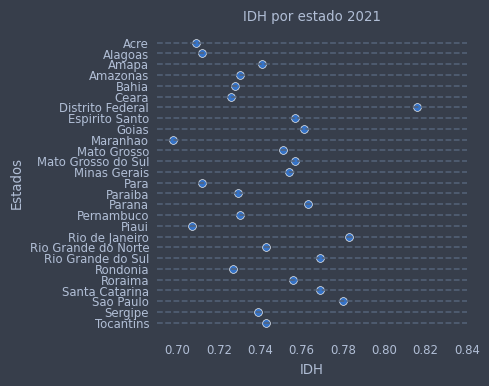

In [71]:
#Plotando gráficos de disperção dos dados de IDH dos estados brasileiros a cada ano entre 2017 e 2021
for cln in dataIdhReg:
    
    #Clear
    cls(wait=True)
    
    #If para ignorar coluna com os estados
    if cln == "Region": continue 

    #Criando gráfico de disperção para todos os estados a cada ano
    dispersaoIdh = sb.scatterplot(data=dataIdhReg, x=cln, y='Region')
    dispersaoIdh.set_title(f'IDH por estado {cln}')
    dispersaoIdh.set_xlabel('IDH')
    dispersaoIdh.set_ylabel('Estados')
    
    eixo = plt.gca()
    eixo.set_xlim([0.69, 0.84])

    #Plotando os gráficos com linhas no eixo 
    plt.grid(axis='x')
    plt.show()

    time.sleep(1)
    

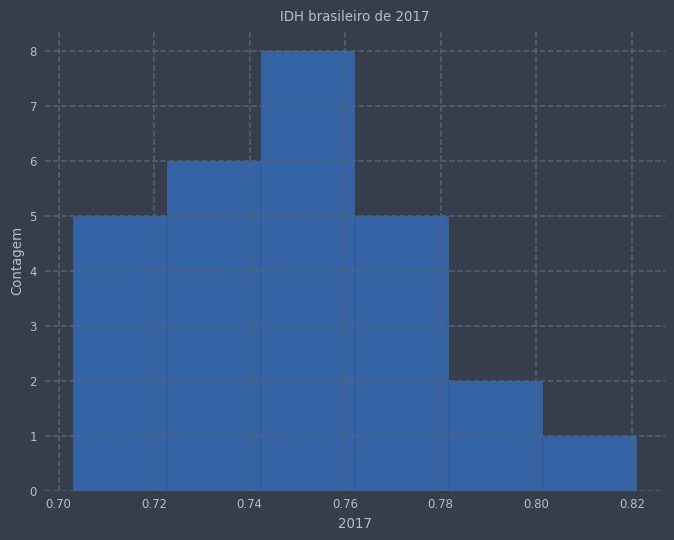

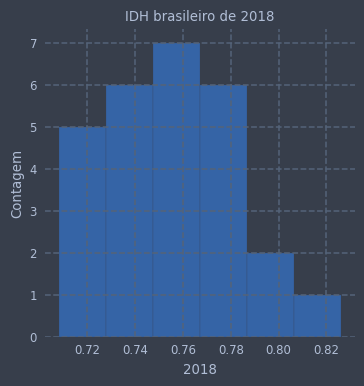

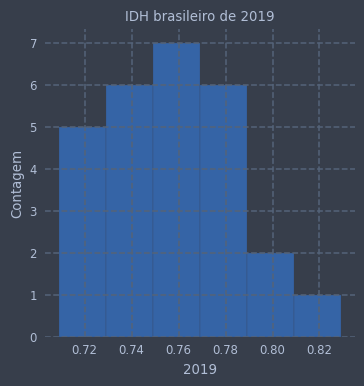

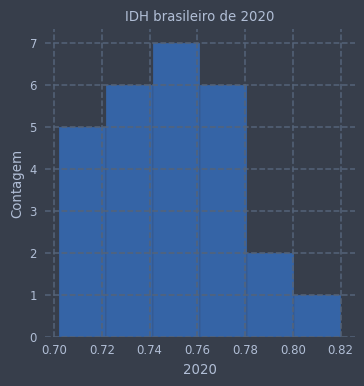

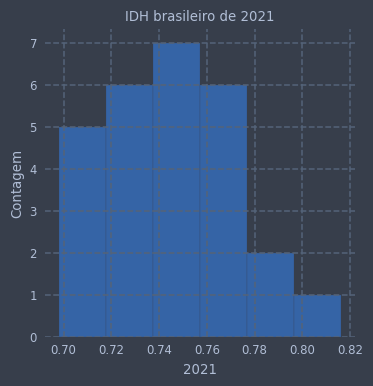

In [72]:
#Definindo o tamanho da imagem do gráfico
plt.figure(figsize=(8,6))

#Plotando histogramas dos dados de IDH dos estados brasileiros entre 2017 e 2021
for cln in dataIdhReg:
    if cln == "Region": continue
    histIdh = sb.histplot(dataIdhReg, x=cln).set_title(f"IDH brasileiro de {cln}")
    
    #Mudando titulo do eixo y
    plt.ylabel("Contagem")

    #Plotando gráfico
    plt.show()

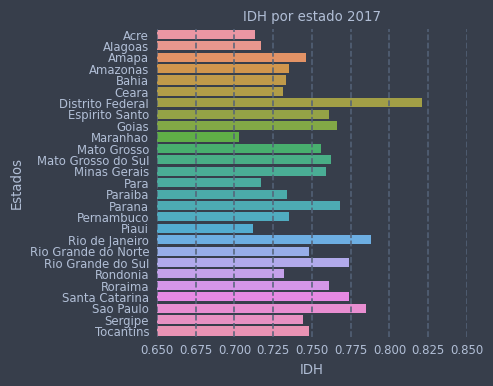

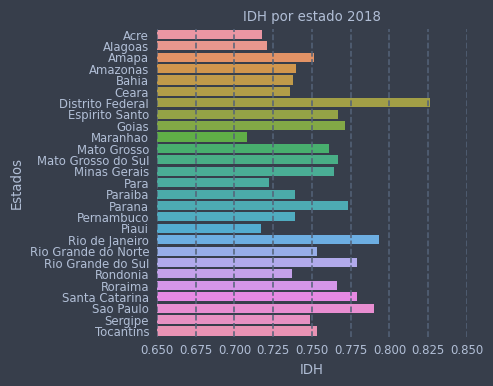

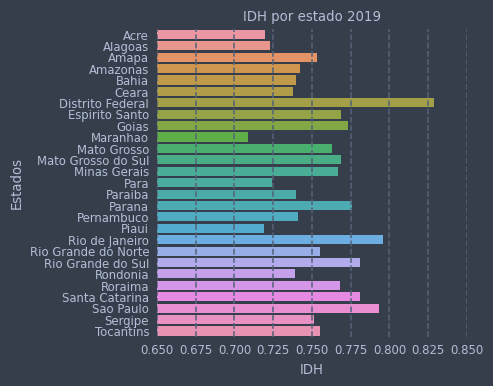

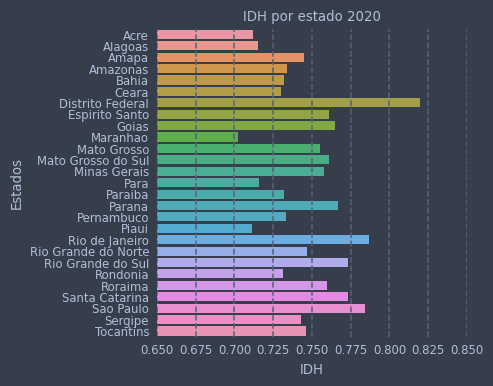

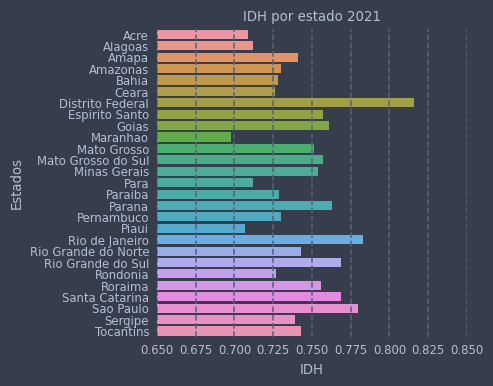

In [73]:
#Plotando gráficos de barra dos dados de IDH dos estados brasileiros entre 2017 e 2021
for cln in dataIdhReg:
    if cln == "Region": continue
    dispersaoIdh = sb.barplot(data=dataIdhReg, x=cln, y='Region')
    dispersaoIdh.set_title(f'IDH por estado {cln}')
    dispersaoIdh.set_xlabel('IDH')
    dispersaoIdh.set_ylabel('Estados')

    #Definindo intervalo de valores do eixo x a ser exibido no gráfico
    eixo = plt.gca()
    eixo.set_xlim([0.65, 0.85])

    #Exibindo gráfico
    plt.show()

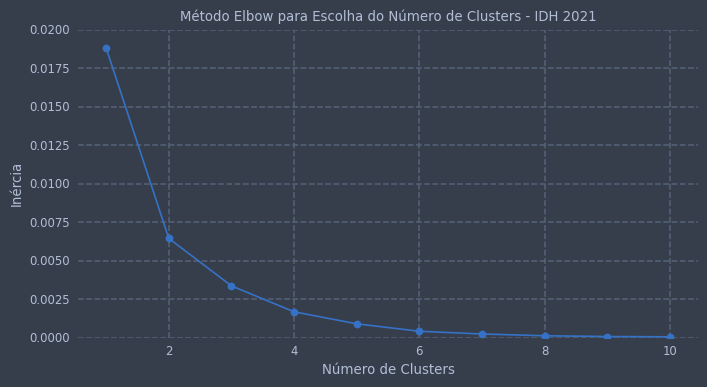

In [74]:
# Escolha do número de clusters usando o método Elbow

#Separando colunas que serão usadas
idhCluster = dataIdhReg[["2017", "2018", "2019", "2020", "2021"]]

for cln in idhCluster:
    cls(wait=True)
    time.sleep(1)
    #Definindo array para dados do algoritmo Kmeans
    inertia = []
    
    for i in range(1, 11):
        #Definindo parâmetros para o algoritmo Kmeans
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)

        #Rodando o algoritmo
        kmeans.fit(idhCluster[[cln]])

        #Salvando dados de eficiência do algoritmo com i centróides
        inertia.append(kmeans.inertia_)

    # Plotagem do gráfico Elbow
    plt.figure(figsize=(8, 4))
    plt.ylim(0,0.02)
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.title(f'Método Elbow para Escolha do Número de Clusters - IDH {cln}')
    plt.grid(True) #Padrão de fundo quadriculado no gráfico
    plt.show()


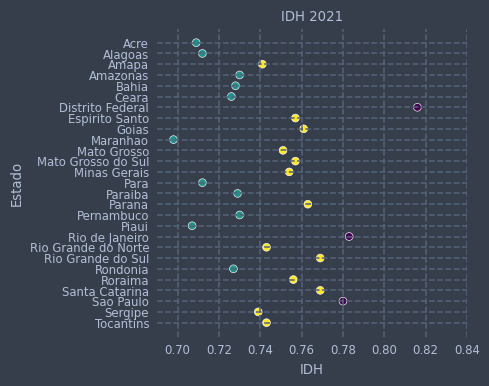

In [75]:
#Número de clusters definido pelo método Elbow
nCluster = 3

#Definindo parâmetros do kmeans
kmeans = KMeans(n_clusters = nCluster, random_state=0, n_init=10)

for cln in idhCluster:
    cls(wait=True)
    #rodando algoritmo K-means para cada ano
    kmeans.fit(idhCluster[[cln]])

    #Criando gráfico de disperção com parâmetro "c" com os resultados do kmeans
    dispersaoIdhCluster = sb.scatterplot(data = dataIdhReg, x = cln, y = 'Region', c = kmeans.labels_)
    dispersaoIdhCluster.set_title(f'IDH {cln}')
    dispersaoIdhCluster.set_xlabel("IDH")
    dispersaoIdhCluster.set_ylabel('Estado')

    eixo = plt.gca()
    eixo.set_xlim([0.69, 0.84])

    #Plotando gráficos
    plt.show()
    time.sleep(1)

# Preço Combustível

In [76]:
preco_comb_df = pd.read_csv("arquivos/Preco_Combustivel/editado-mensal-municipios-2016-a-2018.csv")
df_local = preco_comb_df.groupby(["MÊS", "PRODUTO", "REGIÃO"])
df_local_media = df_local["PREÇO MÉDIO REVENDA"].mean()
df_local_media = df_local_media.to_frame().reset_index()
df_brasil = preco_comb_df.groupby(["MÊS", "PRODUTO"])["PREÇO MÉDIO REVENDA"].mean().to_frame().reset_index()
df_brasil["REGIÃO"] = "BRASIL"
df_final = pd.concat([df_local_media, df_brasil], ignore_index=True)
df_final["MÊS"] = pd.to_datetime(df_final["MÊS"])
df_final = df_final.sort_values(by=["MÊS"])
df_final= df_final[df_final["PRODUTO"] == "GASOLINA COMUM"]
df_final = df_final.groupby(["MÊS"]).agg({"PREÇO MÉDIO REVENDA": "mean"})
df_final.to_csv("arquivos/Preco_Combustivel/PRECO_COMB_2016_2018")

In [77]:
df_local = preco_comb_df.groupby(["MÊS", "PRODUTO", "REGIÃO"])

In [78]:
df_local_media = df_local["PREÇO MÉDIO REVENDA"].mean()

In [79]:
df_local_media = df_local_media.to_frame().reset_index()

In [80]:
df_brasil = preco_comb_df.groupby(["MÊS", "PRODUTO"])["PREÇO MÉDIO REVENDA"].mean().to_frame().reset_index()
df_brasil["REGIÃO"] = "BRASIL"

In [81]:
df_final = pd.concat([df_local_media, df_brasil], ignore_index=True)

In [82]:
df_final.to_csv("arquivos/Preco_Combustivel/novo_arquivo.csv", index=False)

In [83]:
df = pd.read_csv("arquivos/Preco_Combustivel/novo_arquivo.csv") 

In [84]:
df["MÊS"] = pd.to_datetime(df["MÊS"])

In [85]:
df = df.sort_values(by=["MÊS"])

In [86]:
df.to_csv("arquivos/Preco_Combustivel/PRECO_COMB", index=False)

In [87]:
precocombustivel_df = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB")

In [88]:
precocombustivel_df = precocombustivel_df[precocombustivel_df["PRODUTO"] == "GASOLINA COMUM"]

In [89]:
precocombustivel_df = df.groupby(["MÊS"]).agg({"PREÇO MÉDIO REVENDA": "mean"})

In [90]:
precocombustivel_df.to_csv("arquivos/Preco_Combustivel/PRECO_COMB_2016_2018") 

In [91]:
preco_comb2_df = pd.read_csv("arquivos/Preco_Combustivel/editado-mensal-municipios-2019-a-2021.csv")
df_local2 = preco_comb2_df.groupby(["MÊS", "PRODUTO", "REGIÃO"])
df_local_media2 = df_local2["PREÇO MÉDIO REVENDA"].mean()
df_local_media2 = df_local_media2.to_frame().reset_index()
df_brasil2 = preco_comb2_df.groupby(["MÊS", "PRODUTO"])["PREÇO MÉDIO REVENDA"].mean().to_frame().reset_index()
df_brasil2["REGIÃO"] = "BRASIL"
df_final2 = pd.concat([df_local_media2, df_brasil2], ignore_index=True)
df_final2["MÊS"] = pd.to_datetime(df_final2["MÊS"])
df_final2 = df_final2.sort_values(by=["MÊS"])
df_final2= df_final2[df_final2["PRODUTO"] == "GASOLINA COMUM"]
df_final2 = df_final2.groupby(["MÊS"]).agg({"PREÇO MÉDIO REVENDA": "mean"})
df_final2.to_csv("arquivos/Preco_Combustivel/PRECO_COMB_2019_2021")

In [92]:
precocombustivel19_21_df = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB_2019_2021")

In [93]:
preco_comb3_df = pd.read_csv("arquivos/Preco_Combustivel/editado-mensal_municipios-desde_jan2022_a_2024.csv")
df_local3 = preco_comb3_df.groupby(["MÊS", "PRODUTO", "REGIÃO"])
df_local_media3 = df_local3["PREÇO MÉDIO REVENDA"].mean()
df_local_media3 = df_local_media3.to_frame().reset_index()
df_brasil3 = preco_comb3_df.groupby(["MÊS", "PRODUTO"])["PREÇO MÉDIO REVENDA"].mean().to_frame().reset_index()
df_brasil3["REGIÃO"] = "BRASIL"
df_final3 = pd.concat([df_local_media3, df_brasil3], ignore_index=True)
df_final3["MÊS"] = pd.to_datetime(df_final3["MÊS"])
df_final3 = df_final3.sort_values(by=["MÊS"])
df_final3= df_final3[df_final3["PRODUTO"] == "GASOLINA COMUM"]
df_final3 = df_final3.groupby(["MÊS"]).agg({"PREÇO MÉDIO REVENDA": "mean"})
df_final3.to_csv("arquivos/Preco_Combustivel/PRECO_COMB_2022_2024")


In [94]:
precocombustivel22_24_df = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB_2022_2024")

In [95]:
precocombustivel22_24_df

,MÊS,PREÇO MÉDIO REVENDA
0,2022-01-01,6.736561
1,2022-01-02,6.709887
2,2022-01-03,7.108884
3,2022-01-04,7.335032
4,2022-01-05,7.379761
5,2022-01-06,7.365138
6,2022-01-07,6.156560
7,2022-01-08,5.510157
8,2022-01-09,5.153197
9,2022-01-10,4.918640


In [96]:
precomb_2017_2024 = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB_2017_2024.csv")

In [97]:
precomb_2017_2024

,MÊS,PREÇO MÉDIO REVENDA
0,2017-01-01,3.889706
1,2017-01-02,3.875514
2,2017-01-03,3.819460
3,2017-01-04,3.770485
4,2017-01-05,3.751664
...,...,...
80,2023-01-10,5.875074
81,2023-01-11,5.784060
82,2023-01-12,5.730224
83,2024-01-01,5.706699


In [98]:
# Selecionando coluna "Último"
petr3_df = petr3_df["Último"]

In [99]:
dfcombinados = precomb_2017_2024.join(petr3_df)
novoultimo = pd.read_csv("arquivos/Preco_Combustivel/novoultimo.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'arquivos/Preco_Combustivel/novoultimo.csv'

In [ ]:
dfcombinados["Último"] = novoultimo["ÚltimoFinal"]

In [ ]:
dfcombinados.to_csv("dfcombinadosfinal.csv")

In [ ]:
dfcombinadosfinal = pd.read_csv("arquivos/Preco_Combustivel/dfcombinadosfinal.csv")

In [ ]:
dfcombinadosfinal

NameError: name 'dfcombinadosfinal' is not defined

In [ ]:
dfcombinadosfinal = dfcombinadosfinal.drop("Unnamed: 0", axis=1)

In [ ]:
dfcombinadosfinal

,MÊS,PREÇO MÉDIO REVENDA,Último
0,2017-01-04,3.770485,5.94
1,2017-01-05,3.751664,5.64
2,2017-01-06,3.696870,5.46
3,2017-01-07,3.689708,5.71
4,2017-01-08,3.911672,5.78
...,...,...,...
79,2023-01-11,5.784060,37.70
80,2023-01-12,5.730224,38.98
81,2024-01-01,5.706699,42.16
82,2024-01-02,5.864322,41.22


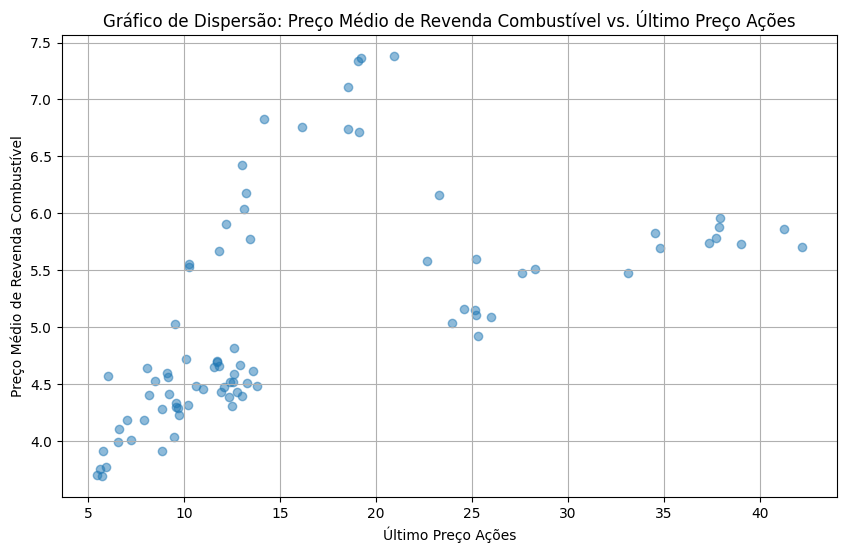

In [ ]:
preco_medio_revenda = dfcombinadosfinal['PREÇO MÉDIO REVENDA']
ultimo = dfcombinadosfinal['Último']

plt.figure(figsize=(10, 6))
plt.scatter(ultimo, preco_medio_revenda, alpha=0.5)

plt.title('Gráfico de Dispersão: Preço Médio de Revenda Combustível vs. Último Preço Ações')
plt.xlabel('Último Preço Ações')
plt.ylabel('Preço Médio de Revenda Combustível')

plt.grid(True)
plt.show()

# IPCA

In [101]:
#Criando dataframe pra receber dados do ipca de cada mes dos anos de 2017 a 2021
dataIpcaMedio = pd.DataFrame(columns=["Mes", "2017", "2018", "2019", "2020", "2021"])

#criando tupla com todos os meses do ano
meses = ("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro",
        "Novembro", "Dezembro")

#atribuindo os meses do ano à coluna "Mes"
for mes in meses:
    dataIpcaMedio = dataIpcaMedio._append({"Mes": mes}, ignore_index=True)

#For's para percorrer os arquivos com os dados
for j in range(17, 22): #For para os dados dos anos 2017 a 2021

    for i in range(1, 13): #For para os dados do mes de Janeiro a Dezembro

        if i < 10: #if para evitar erro no caminho até o arquivo
            dataIpca = pd.read_csv(f"arquivos/IPCA/ipca_20{j}/ipca_20{j}0{i}Subitem.csv")
        else:
            dataIpca = pd.read_csv(f"arquivos/IPCA/ipca_20{j}/ipca_20{j}{i}Subitem.csv")
        
        #Atribuição dos dados ao dataframe
        dataIpcaMedio.loc[i-1, f"20{j}"] = dataIpca["NACIONAL"].loc[0]

# tratando os tipos
dataIpcaMedio = dataIpcaMedio.astype("float64", errors="ignore")

#Printando informações dos dados (Variancia, média, quartis, etc...) de acordo com as colunas (Anos referencia)
desc_ipcaMedio = dataIpcaMedio.describe()
desc_ipcaMedio.loc[len(desc_ipcaMedio)] = dataIpcaMedio.var(numeric_only=True, axis=0)
desc_ipcaMedio = desc_ipcaMedio.rename(index={8: "var"})
desc_ipcaMedio

,2017,2018,2019,2020,2021
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.242500,0.307500,0.352500,0.370000,0.802500
std,0.177463,0.365864,0.349418,0.497978,0.305529
min,-0.230000,-0.210000,-0.040000,-0.380000,0.250000
25%,0.182500,0.135000,0.107500,0.175000,0.680000
50%,0.265000,0.305000,0.255000,0.255000,0.865000
75%,0.342500,0.412500,0.525000,0.695000,0.952500
max,0.440000,1.260000,1.150000,1.350000,1.250000
var,0.031493,0.133857,0.122093,0.247982,0.093348


Text(0.5, 1.0, 'IPCA ao longo dos anos')

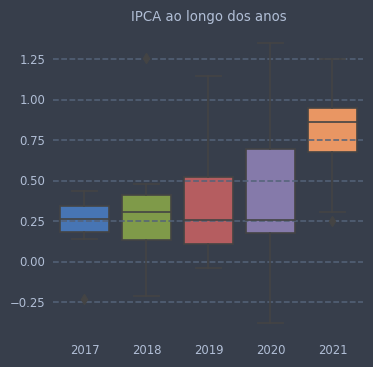

In [102]:
#Boxplot dos dados de IPCA ao longo dos anos de 2017 a 2021
sb.boxplot(data=dataIpcaMedio).set_title('IPCA ao longo dos anos')

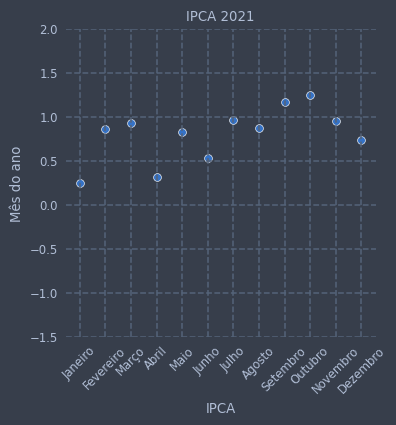

In [109]:
#Gráficos de disperção dos dados de IPCA por mes de cada ano entre 2017 e 2021
for cln in dataIpcaMedio:
    cls(wait=True)
    if cln == "Mes": continue
    dispersaoIpca = sb.scatterplot(data=dataIpcaMedio, x='Mes', y=cln)
    dispersaoIpca.set_title(f'IPCA {cln}')
    dispersaoIpca.set_xlabel("IPCA")
    dispersaoIpca.set_ylabel('Mês do ano')

    eixo = plt.gca()
    eixo.set_ylim([-1.5, 2])

    plt.xticks(rotation=45)
    plt.show()
    time.sleep(1)

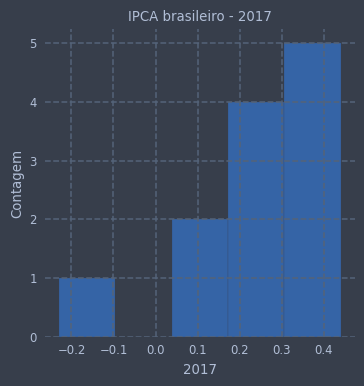

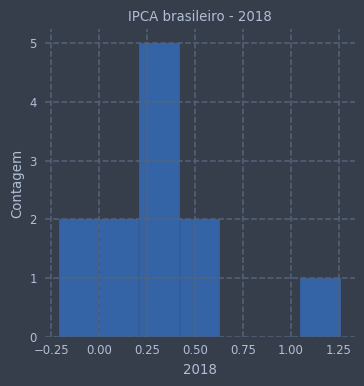

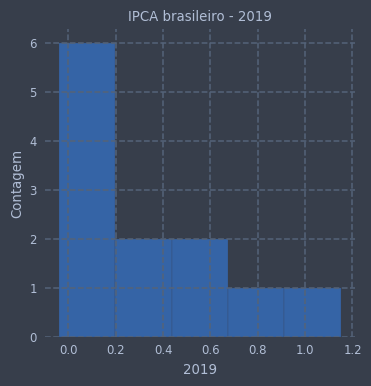

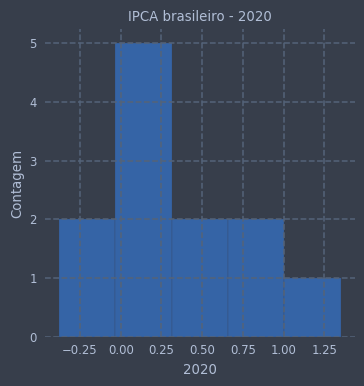

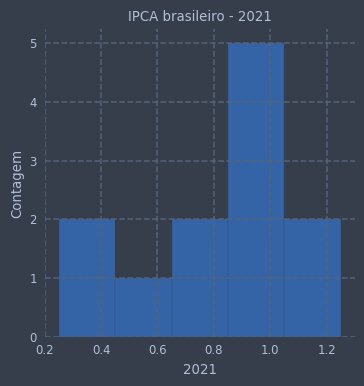

In [110]:
#Histogramas dos dados de IPCA por ano
for cln in dataIpcaMedio:
    if cln == "Mes": continue
    histIpca = sb.histplot(dataIpcaMedio, x=cln).set_title(f"IPCA brasileiro - {cln}")

    #Mudando titulo do eixo y
    plt.ylabel("Contagem")

    #Plotando o gráfico
    plt.show()

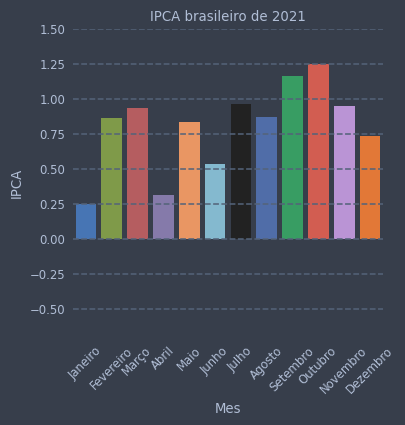

In [120]:
#Gráficos de barra dos dados de IPCA por mês ao longo dos anos entre 2017 e 2021
for cln in dataIpcaMedio:
    cls(wait=True)
    time.sleep(1)
    if cln == "Mes": continue
    histIpca = sb.barplot(dataIpcaMedio, x='Mes', y=cln).set_title(f"IPCA brasileiro de {cln}")

    #Mudando nome do eixo y
    plt.ylabel("IPCA")

    #Rotacionando os títulos do eixo x
    plt.xticks(rotation=45)
    plt.ylim(-0.7,1.5)

    #Exibindo gráficos
    plt.show()

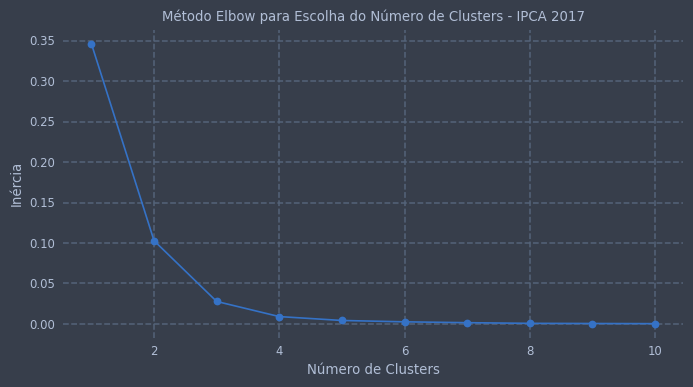

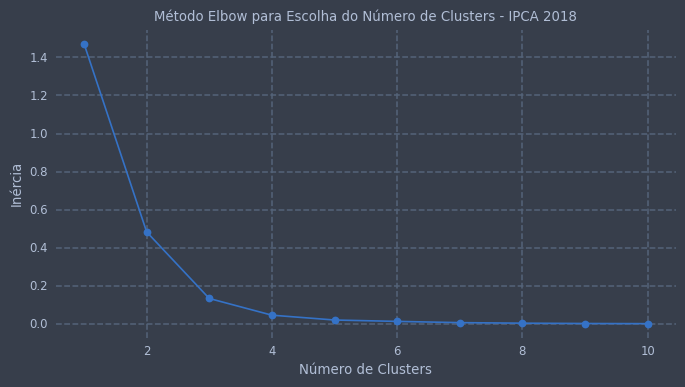

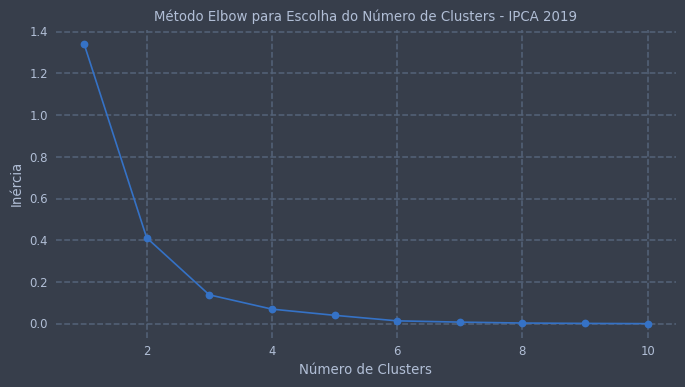

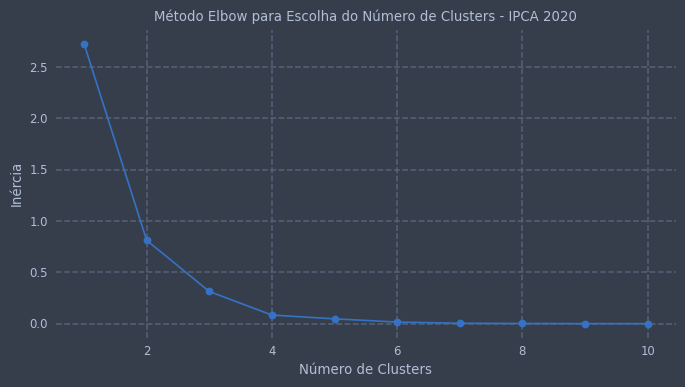

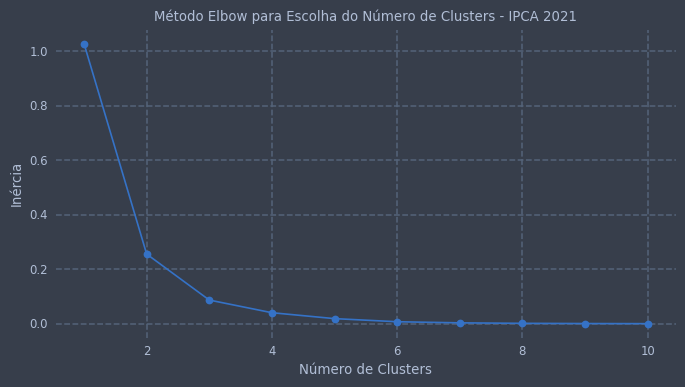

In [106]:
# Escolha do número de clusters usando o método Elbow

#Separando as colunas do dataset que serão usadas
ipcaCluster = dataIpcaMedio[["2017", "2018", "2019", "2020", "2021"]]

for cln in ipcaCluster:
    #Criando vetor para armazenar informações do kmeans
    inertia = []

    for i in range(1, 11):
        #Passando os parâmetros para o algoritmo Kmeans
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)

        #Rodando o algoritmo
        kmeans.fit(ipcaCluster[[cln]])

        #Salvando dados de eficiência do algoritmo com i centróides
        inertia.append(kmeans.inertia_)

    # Plotagem do gráfico Elbow
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.title(f'Método Elbow para Escolha do Número de Clusters - IPCA {cln}')
    plt.grid(True) #Padrão de fundo quadriculado no gráfico
    plt.show()



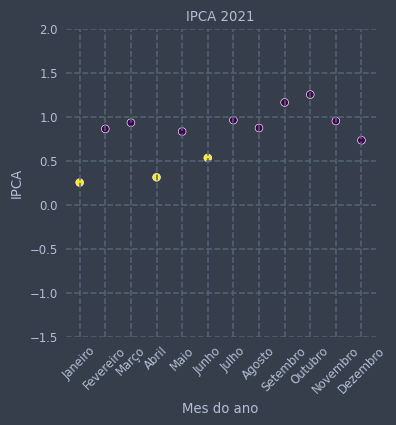

In [116]:
#Número de clusters definido pelo método Elbow
nCluster = 2

#Definindo parâmetros do kmeans
kmeans = KMeans(n_clusters = nCluster, random_state=0, n_init=10)

for cln in ipcaCluster:
    cls(wait=True)
    #rodando algoritmo K-means para cada gráfico
    kmeans.fit(ipcaCluster[[cln]])

    #Criando gráfico de disperção com parâmetro "c" com os resultados do kmeasn
    dispersaoIpca = sb.scatterplot(data = dataIpcaMedio, x = "Mes", y = cln, c = kmeans.labels_)
    dispersaoIpca.set_title(f'IPCA {cln}')
    dispersaoIpca.set_xlabel("Mes do ano")
    dispersaoIpca.set_ylabel("IPCA")

    eixo = plt.gca()
    eixo.set_ylim([-1.5, 2])

    plt.xticks(rotation=45)
    #Plotando gráficos
    plt.show()
    time.sleep(1)

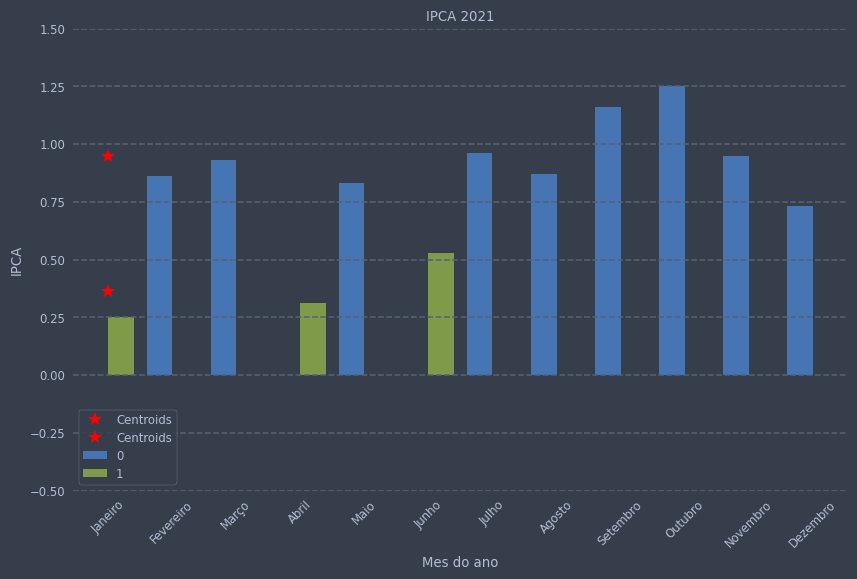

In [125]:
# Número de clusters definido pelo método Elbow
nCluster = 2

# Definindo parâmetros do KMeans
kmeans = KMeans(n_clusters=nCluster, random_state=0, n_init=10)

for cln in ipcaCluster:
    cls(wait=True)
    # Rodando o algoritmo K-means para cada gráfico
    kmeans.fit(ipcaCluster[[cln]])

    # Calculando os centróides dos clusters
    centroids = kmeans.cluster_centers_

    # Criando gráfico de barras com parâmetro "hue" com os resultados do KMeans
    plt.figure(figsize=(10, 6))
    barrasIpca = sb.barplot(data=dataIpcaMedio, x="Mes", y=cln, hue=kmeans.labels_)
    barrasIpca.set_title(f'IPCA {cln}')
    barrasIpca.set_xlabel("Mes do ano")
    barrasIpca.set_ylabel("IPCA")

    # Plotando os centróides dos clusters
    plt.plot(centroids.T, marker='*', markersize=10, linestyle='', color='red', label='Centroids')

    plt.xticks(rotation=45)
    plt.legend()
    plt.ylim(-0.5,1.5)
    # Plotando gráfico
    plt.show()
    time.sleep(1)